In [1]:
my_list = [1, 2, 3, 4]
# instead of list, a directory of images to train NN.

In [ ]:
dir(my_list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
# my_list_iter = my_list.__iter__()
my_list_iter = iter(my_list)

In [ ]:
dir(my_list_iter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
#  list -> __iter__
#  on using .__iter__() -> __iter__ and __next__

In [ ]:
for i in my_list:
  print(i)

1
2
3
4


In [ ]:
my_list[0]
# I want the same functionality while loading data as well.

1

In [ ]:
# Let's see the working of for loop under the hood

In [ ]:
# my_list is an iterable, my_list_iter -> iterator
# Dataset -> iterable, DataLoader -> iterator.
dir(my_list_iter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
next(my_list_iter)

1

In [ ]:
next(my_list_iter)

2

In [ ]:
next(my_list_iter)

3

In [ ]:
next(my_list_iter)

4

In [ ]:
next(my_list_iter)

StopIteration: ignored

In [ ]:
for i in my_list:
  print(i)

1
2
3
4


In [ ]:
my_list_iter = iter(my_list)
while True:
  try:
    element = next(my_list_iter)
    print(element)
  except StopIteration:
    break

1
2
3
4


In [ ]:
# my_list[1]
my_list.__getitem__(1)

2

In [ ]:
my_list?

In [ ]:
# use case is we have .txt file, 10000 lines.
# NLP application, epoch I just want 2 lines -> feed my network
#  how do we do that


# 1st approach.
# Load the entire .txt file as a list. -> pytorch Tensor -> Dataset -> DataLoader -> to load my data.

from torch.utils.data import Dataset

# Dataset is there to be able to interact with DataLoader

class MyDataset(Dataset):
  def __init__(self):
    self.data = (
        "This was an amazing product",
        "This was the shittiest product possible",
        "Amazing product, fast delivery",
        "Had to sell my kidney to buy this, and now my life has changed",
        "Good one!",
        "Bad One!"
    )
    # self.file_path = 'googl/drive/"
    #
    # self.data = pd.read_csv('txtfile.csv')

  def __getitem__(self, index):
    # return self.images[index], self.label[index]
    return self.data[index]

  def __len__(self):
    return len(self.data)

myData = MyDataset()



In [ ]:
type(myData), dir(myData)

(__main__.MyDataset,
 ['__add__',
  '__annotations__',
  '__class__',
  '__class_getitem__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__doc__',
  '__eq__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getitem__',
  '__gt__',
  '__hash__',
  '__init__',
  '__init_subclass__',
  '__le__',
  '__len__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__orig_bases__',
  '__parameters__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__setattr__',
  '__sizeof__',
  '__slots__',
  '__str__',
  '__subclasshook__',
  '__weakref__',
  '_is_protocol',
  'data'])

In [ ]:
my_data_iter = iter(myData)

In [ ]:
dir(my_data_iter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
for m in myData:
  print(m)

This was an amazing product
This was the shittiest product possible
Amazing product, fast delivery
Had to sell my kidney to buy this, and now my life has changed
Good one!
Bad One!


In [ ]:
# we need DataLoader

from torch.utils.data import DataLoader
train_loader = DataLoader(myData, batch_size = 2, shuffle=True)

In [ ]:
for i in range(10):
  print(next(iter(train_loader)))

['This was the shittiest product possible', 'Had to sell my kidney to buy this, and now my life has changed']
['Had to sell my kidney to buy this, and now my life has changed', 'Good one!']
['This was an amazing product', 'Amazing product, fast delivery']
['Amazing product, fast delivery', 'Good one!']
['Had to sell my kidney to buy this, and now my life has changed', 'This was an amazing product']
['Amazing product, fast delivery', 'Had to sell my kidney to buy this, and now my life has changed']
['Bad One!', 'Amazing product, fast delivery']
['Had to sell my kidney to buy this, and now my life has changed', 'This was an amazing product']
['Amazing product, fast delivery', 'Bad One!']
['This was the shittiest product possible', 'Amazing product, fast delivery']


In [ ]:
# now let's work with FashionMnist
import torchvision
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)


100%|██████████| 26421880/26421880 [00:02<00:00, 11323084.75it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203819.19it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3744809.37it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5372549.64it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
train_mnist_loader = DataLoader(train_set, batch_size=32, shuffle=True)

In [ ]:
len(next(iter(train_mnist_loader)))

2

In [ ]:
batch = next(iter(train_mnist_loader))

In [ ]:
# batch -> a list of 128 images , labels.
batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
train_set.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
sample = next(iter(train_set))

len(sample)

2

In [ ]:
image, label = sample

In [ ]:
image.shape
# 1 -> Grey scale image (channels)
# 28, 28 -> height, width of the image.

torch.Size([1, 28, 28])

In [ ]:
image.shape
image.squeeze().shape

torch.Size([28, 28])

label: 9


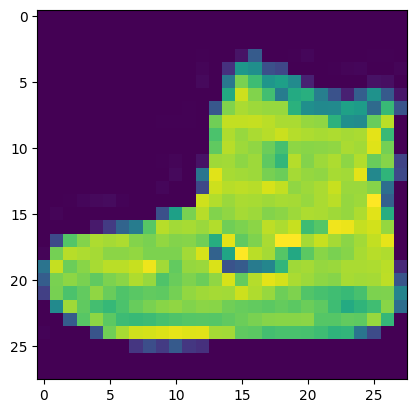

In [ ]:
plt.imshow(image.squeeze())
print('label:', label)

NameError: ignored

In [ ]:
batch = next(iter(train_loader))
len(batch), type(batch)
images, labels = batch

In [ ]:
grid = torchvision.utils.make_grid(images,  nrow=8)
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

TypeError: ignored

## 2nd Attempt

In [ ]:
li = [1, 2, 3, 4]


In [ ]:
dir(li)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
li[1]

2

In [ ]:
li.__getitem__(1)

2

In [ ]:
x = 1
x + 2


3

In [ ]:
x = 1
x.__add__(2)

3

In [ ]:
# lists , sequences -> Lists, tuples, dict

li = [1, 2, 3, 4, 5]
for i in li:
  print(i)

# Image classification task; folder on their drive -> 1000000 images and labels.

# download the data/use APIs to read data from their drive
# 2. How are you going to feed the data to the model?
# Load batches.
# batch_size = 256 (image, label) problem 1

# Let's say wrong predictions -> indices of the images -> How to retrieve them ? [10, 20, 22, 40, 45.......] Problem 2 sol: list ? li[10]
# model on GPU, your data is on drive. 1. Download small batches -> CPU -> PyTorch Tensor (becoz model was developed using PyTorch) -> GPU -> train -> error
# list(256) -> tensor (each one of them) -> tensor[256 tensors] -> GPU

# DataSets and DAtaLoaders. API.
# DataSets to create datasets (image ->label) prob1, 2 -> Iterables.
# DataLoader -> to load the data effectively. prob3

1
2
3
4
5


In [ ]:
# __iter__, __getitem__ (seen)

dir(li)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
# li_iter = li.__iter__()
li_iter = iter(li)
dir(li_iter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
# __next__
next(li_iter)

1

In [ ]:
next(li_iter)

2

In [ ]:
next(li_iter)

3

In [ ]:
next(li_iter)

4

In [ ]:
next(li_iter)

5

In [ ]:
next(li_iter)

StopIteration: ignored

In [ ]:
for i in li:
  print(i)

1
2
3
4
5


In [ ]:
# Let's see under the hood
# li -> list -> iterable.
# to iterate it, we need iterator -> li_iter or iter(li)
li_iter = iter(li)
while True:
  try:
    val = next(li_iter)
    print(val)
  except StopIteration:
    break


1
2
3
4
5
